<a href="https://colab.research.google.com/github/JoseAaronE/FisicaComputacional/blob/master/Actividad5/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 5 
Esquivel Ovilla José Aarón 

In [92]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

#parte de la actividad anterior 
url="https://raw.githubusercontent.com/JoseAaronE/FisicaComputacional/master/Actividad1/Estacion3016datos.txt"

#aplicamos todas las intrucciones del ejercicio anterior 
#estación principal 
columnas=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"]
df_dist = pd.read_csv(url, names=columnas, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#estación 1 "hacemos la copia del trabajo"
df_cop0= df_dist.copy()

#reemplazamos donde dice nulo para que salga en blanco 
str_Nulo= "Nulo"
df_cop1 = df_cop0.replace(to_replace=str_Nulo, value='', regex=True)

#convertimos a numeros flotantes los valores de las variables 
cols_list = ["PRECIP", "EVAP", "TMAX", "TMIN"]
for cols in cols_list:
  df_cop1[cols] = pd.to_numeric(df_cop1[cols], errors='coerce')

#hacemos otra copia del archivo
df_cop2 = df_cop1.copy()

df_cop2["FECHA"]=pd.to_datetime(df_cop2["FECHA"], dayfirst=True).copy()

df_cop2['Año'] = df_cop2['FECHA'].dt.year
df_cop2['Mes'] = df_cop2['FECHA'].dt.month

df_meteo = df_cop2.copy()
#eliminamos las columnas de mes que es están como numeros y las cambiaremos por caracteres
df_meteo.drop("Mes", axis=1, inplace=True)
df_meteo["Mes"] = df_meteo["FECHA"].dt.strftime("%b")

esta= "El rosarito (Mulegé)"
df_meteo_ts=df_meteo.copy()
df_meteo_ts=df_meteo_ts.set_index('FECHA')
print(df_meteo_ts)

            PRECIP  EVAP  TMAX  TMIN   Año  Mes
FECHA                                          
1941-07-10     0.0   NaN  41.0   NaN  1941  Jul
1941-07-11     0.0   NaN  42.0  24.0  1941  Jul
1941-07-12     0.0   NaN  41.0  31.0  1941  Jul
1941-07-13     0.0   NaN  39.0  28.0  1941  Jul
1941-07-14     0.0   NaN  39.0  27.0  1941  Jul
...            ...   ...   ...   ...   ...  ...
2017-12-27     0.0   NaN  27.0  10.0  2017  Dec
2017-12-28     0.0   NaN  29.0  11.0  2017  Dec
2017-12-29     0.0   NaN  29.0  11.0  2017  Dec
2017-12-30     0.0   NaN  30.0   9.0  2017  Dec
2017-12-31     0.0   NaN  32.0  10.0  2017  Dec

[27166 rows x 6 columns]


In [93]:
#Trabajando con la segunda estación para poder gráficar la evaporación 
ur="https://raw.githubusercontent.com/JoseAaronE/FisicaComputacional/master/Actividad5/26096sonoita.txt"

#aplicamos todas las intrucciones del ejercicio anterior 
#estación principal 
columnas_2=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"]
df_dist_2 = pd.read_csv(ur, names=columnas_2, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#estación 1 "hacemos la copia del trabajo"
df_cop0_2= df_dist_2.copy()

#reemplazamos donde dice nulo para que salga en blanco 
str_Nulo= "Nulo"
df_cop1_2 = df_cop0_2.replace(to_replace=str_Nulo, value='', regex=True)

#convertimos a numeros flotantes los valores de las variables 
cols_list_2 = ["EVAP"]
for cols in cols_list_2:
  df_cop1_2[cols] = pd.to_numeric(df_cop1_2[cols], errors='coerce')

#hacemos otra copia del archivo
df_cop2_2 = df_cop1_2.copy()

df_cop2_2["FECHA"]=pd.to_datetime(df_cop2_2["FECHA"], dayfirst=True).copy()

df_cop2_2['Año'] = df_cop2_2['FECHA'].dt.year
df_cop2_2['Mes'] = df_cop2_2['FECHA'].dt.month

df_meteo_2 = df_cop2_2.copy()
#eliminamos las columnas de mes que es están como numeros y las cambiaremos por caracteres
df_meteo_2.drop("Mes", axis=1, inplace=True)
df_meteo_2["Mes"] = df_meteo_2["FECHA"].dt.strftime("%b")

esta= "El rosarito (Mulegé)"
df_meteo_ts_2=df_meteo_2.copy()
df_meteo_ts_2=df_meteo_ts_2.set_index('FECHA')
print(df_meteo_ts_2)

            PRECIP  EVAP  TMAX TMIN   Año  Mes
FECHA                                         
1948-11-12     0.0   NaN  24.7       1948  Nov
1948-11-13     0.0   NaN  25.5  6.1  1948  Nov
1948-11-14     0.0   NaN  26.8  6.4  1948  Nov
1948-11-15     0.0   NaN  26.8  6.2  1948  Nov
1948-11-16     0.0   NaN  29.2  6.3  1948  Nov
...            ...   ...   ...  ...   ...  ...
2016-05-27     0.0   8.3    34   12  2016  May
2016-05-28     0.0   9.8    35   14  2016  May
2016-05-29     0.0  10.3    34   14  2016  May
2016-05-30     0.0   9.2    35   14  2016  May
2016-05-31     0.0   NaN         14  2016  May

[24085 rows x 6 columns]


In [94]:
#estación1 
# Agrupamos los últimos 30 años, aproximadamente, de los datos:
df_90=df_meteo_ts[(df_meteo_ts['Año']>=1990) & (df_meteo_ts['Año']<2017)]
# Cambiamos el nombre de las columnas para hacer más sencilla la referencia a ellas.
Columnas=['Precip', 'Evap', 'Tmax', 'Tmin', 'Año', 'Mes']
df_90.columns=Columnas
print(df_90)

#estación2
df_90_2=df_meteo_ts_2[(df_meteo_ts_2["Año"]>=1990) & (df_meteo_ts_2["Año"]<2015)]
Columnas_2=['Precip', 'Evap', 'Tmax', 'Tmin', 'Año', 'Mes']
df_90_2.columns_2=Columnas_2
print(df_90_2)

            Precip  Evap  Tmax  Tmin   Año  Mes
FECHA                                          
1990-01-01     0.0   NaN  35.5   5.5  1990  Jan
1990-01-02     0.0   NaN  29.0  10.0  1990  Jan
1990-01-03     0.0   NaN  34.5   6.0  1990  Jan
1990-01-04     0.0   NaN  27.5  10.0  1990  Jan
1990-01-05     0.0   NaN  27.5  10.5  1990  Jan
...            ...   ...   ...   ...   ...  ...
2016-12-27     0.0   NaN  23.0  11.0  2016  Dec
2016-12-28     0.0   NaN  23.0  10.0  2016  Dec
2016-12-29     0.0   NaN  25.0   7.0  2016  Dec
2016-12-30     0.0   NaN  20.0   9.0  2016  Dec
2016-12-31     0.0   NaN  25.0   8.0  2016  Dec

[9583 rows x 6 columns]
            PRECIP  EVAP  TMAX  TMIN   Año  Mes
FECHA                                          
1990-01-01     0.0   3.6  20.5     1  1990  Jan
1990-01-02    12.8   0.6  16.5     4  1990  Jan
1990-01-03     0.0   1.7    11   1.5  1990  Jan
1990-01-04     0.0   2.2    12  -2.5  1990  Jan
1990-01-05     0.0   3.1    14    -2  1990  Jan
...            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


Text(0.5, 1.0, 'Precipitación de los últimos 30 años de el Rosarito (Mulegé)')

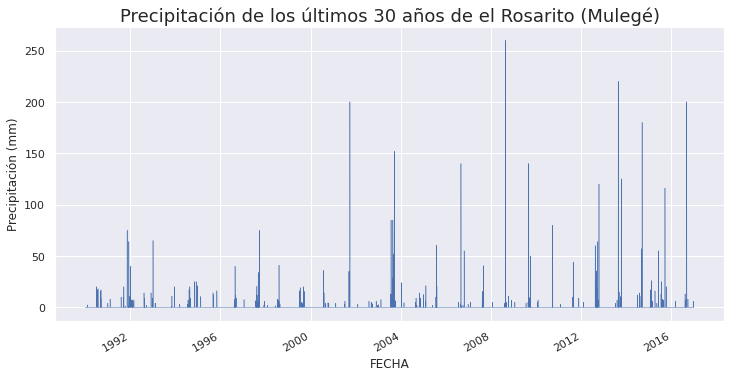

In [95]:
#Estación1
#Grafica todo el rango de datos utilizando la función df.plot()
#creamos un conjunto con los datos desde 1990 hasta el final de datos que tenemos con las variables
#Precipitación, Evaporación, Temperatura máxima, Temperatura mínima 
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2017)]
sns.set(rc={'figure.figsize':(12, 6)})

# Graficamos la precipitación de la epoca 90 a la actualidad
df_90['PRECIP'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');
plt.title('Precipitación de los últimos 30 años de el Rosarito (Mulegé)', fontsize=18)

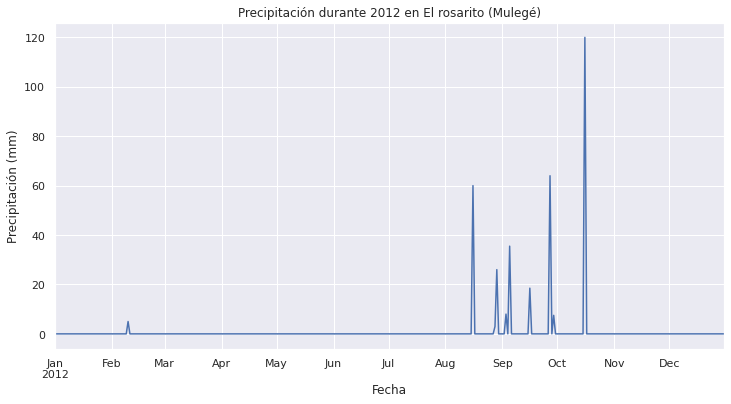

In [96]:
#analizamos un año en especifico 2012
ax1=df_meteo_ts.loc['2012','PRECIP'].plot()
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Fecha')
plt.title('Precipitación durante 2012 en '+esta)
plt.show()

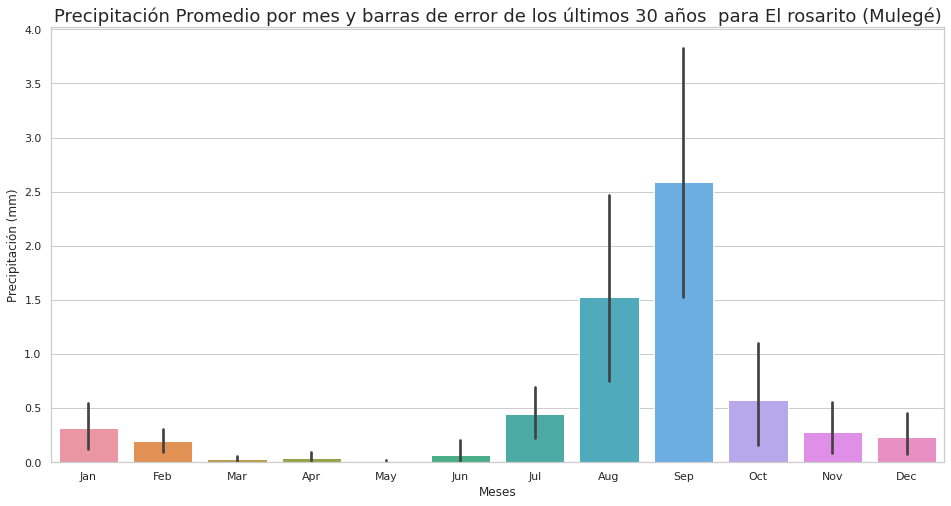

In [97]:
#Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='PRECIP', data=df_90);
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio por mes y barras de error de los últimos 30 años  para El rosarito (Mulegé)', fontsize=18)
plt.show()

In [98]:
#Estación1
# agarramos los datos desde 1990 hasta la actualidad 
df_meteo90=df_meteo_ts[(df_meteo_ts['Año']>=1990)&(df_meteo_ts['Año']<2017)]
df_meteo90.columns=Columnas
print(df_meteo90)

#Estación2
# agarramos los datos desde 1990 hasta la actualidad 
df_meteo90_2=df_meteo_ts_2[(df_meteo_ts_2['Año']>=1990)&(df_meteo_ts_2['Año']<2017)]
df_meteo90_2.columns_2=Columnas_2
print(df_meteo90_2)


            Precip  Evap  Tmax  Tmin   Año  Mes
FECHA                                          
1990-01-01     0.0   NaN  35.5   5.5  1990  Jan
1990-01-02     0.0   NaN  29.0  10.0  1990  Jan
1990-01-03     0.0   NaN  34.5   6.0  1990  Jan
1990-01-04     0.0   NaN  27.5  10.0  1990  Jan
1990-01-05     0.0   NaN  27.5  10.5  1990  Jan
...            ...   ...   ...   ...   ...  ...
2016-12-27     0.0   NaN  23.0  11.0  2016  Dec
2016-12-28     0.0   NaN  23.0  10.0  2016  Dec
2016-12-29     0.0   NaN  25.0   7.0  2016  Dec
2016-12-30     0.0   NaN  20.0   9.0  2016  Dec
2016-12-31     0.0   NaN  25.0   8.0  2016  Dec

[9583 rows x 6 columns]
            PRECIP  EVAP  TMAX  TMIN   Año  Mes
FECHA                                          
1990-01-01     0.0   3.6  20.5     1  1990  Jan
1990-01-02    12.8   0.6  16.5     4  1990  Jan
1990-01-03     0.0   1.7    11   1.5  1990  Jan
1990-01-04     0.0   2.2    12  -2.5  1990  Jan
1990-01-05     0.0   3.1    14    -2  1990  Jan
...            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Evaporación (mm)')

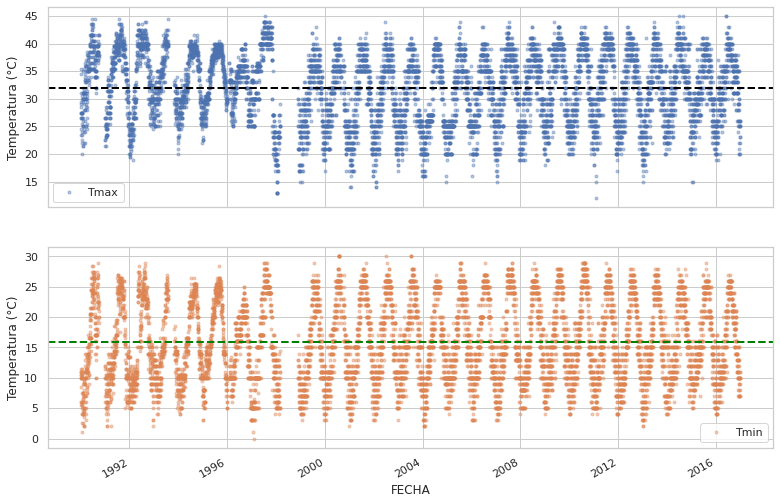

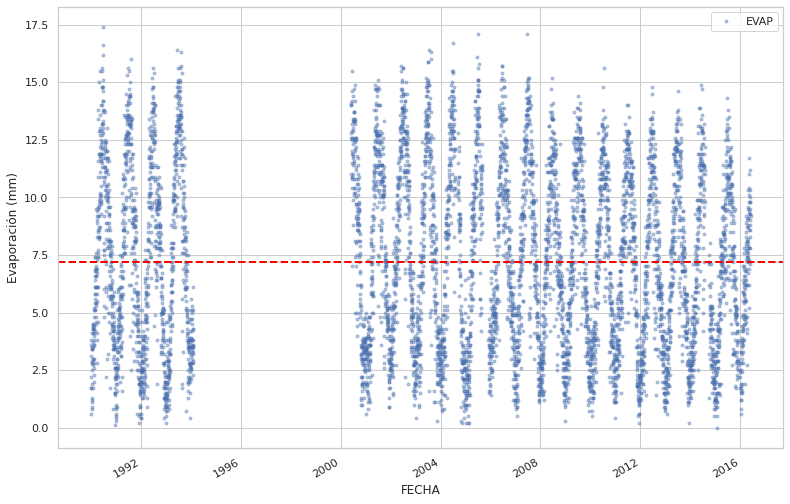

In [99]:
#pasos de la actividad 2
#gráficamos todo el rango de datos desde 1990
#Estación1
colsplot=['Tmax','Tmin']
ax_ylabels=['Temp. Máxima (°C)', 'Temp. Mínima (°C)','Evaporación (mm)']
Tmax_d90=df_meteo90['Tmax'].mean()
Tmin_d90=df_meteo90['Tmin'].mean()

axes=df_meteo90[colsplot].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9), subplots=True)

for i, ax in zip(colsplot,axes):
  if i=='Tmax':
    ax.axhline(Tmax_d90, color='black', linestyle='--', linewidth=2)
    ax.set_ylabel('Temperatura (°C)')
  elif i=='Tmin':
    ax.axhline(Tmin_d90, color='green', linestyle='--', linewidth=2)
    ax.set_ylabel('Temperatura (°C)')

#Paso de la actividad 3 con evaporación 
#Estación2
colsplot_2=['EVAP']
EVAP_d90_2=df_meteo90_2['EVAP'].mean()
axes=df_meteo90_2[colsplot_2].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9))

plt.axhline(EVAP_d90_2, color='red', linestyle='--', linewidth=2)
plt.ylabel('Evaporación (mm)') 


Text(0, 0.5, 'Evaporación (mm)')

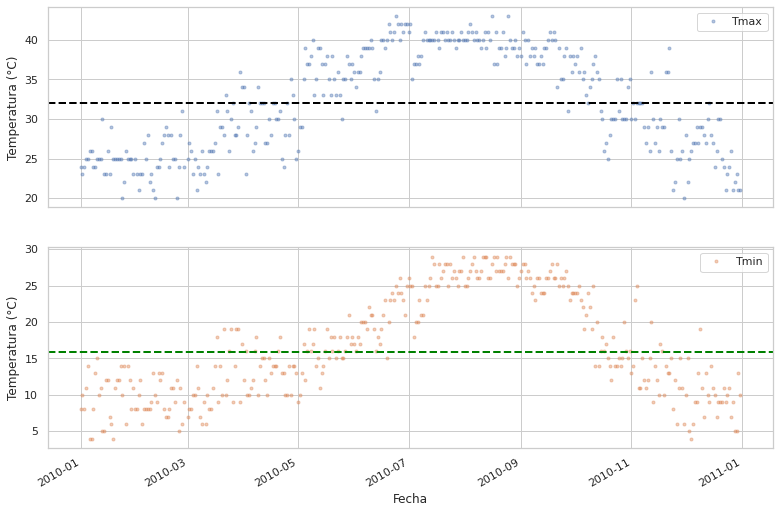

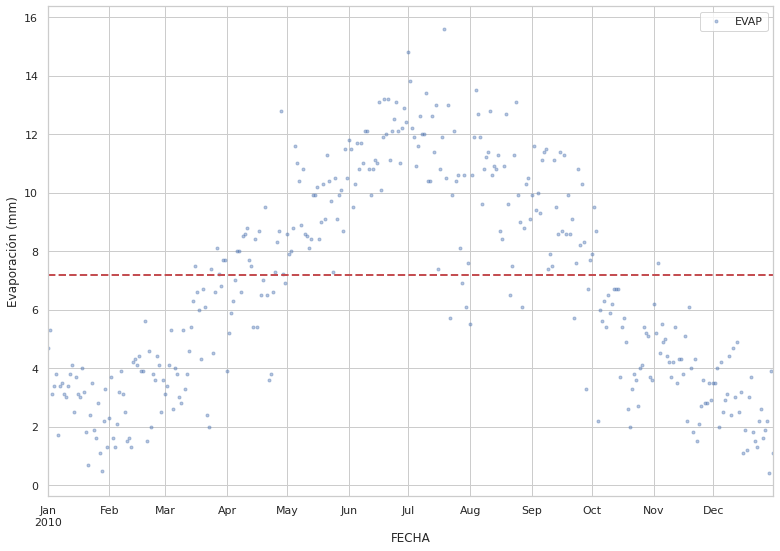

In [100]:
#analizar un año en especifico (2010) para las Temperaturas máximas y mínimas, junto con evaporación 
#Estación 1
axes=df_meteo90[colsplot].loc["2010"].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9), subplots=True)
for i, ax in zip(['Tmax', 'Tmin', 'Evap'],axes):
  if i=='Tmax':
    ax.axhline(Tmax_d90, color='black', linestyle='--', linewidth=2)
    ax.set_ylabel('Temperatura (°C)')
  elif i=='Tmin':
    ax.axhline(Tmin_d90, color='green', linestyle='--', linewidth=2)
    ax.set_ylabel('Temperatura (°C)')
plt.xlabel('Fecha')

#Paso de la actividad 3 con evaporación 
#Estación 2
axes=df_meteo90_2[colsplot_2].loc["2010"].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9))
plt.axhline(EVAP_d90_2, color='r', linestyle='--', linewidth=2)
plt.ylabel('Evaporación (mm)')

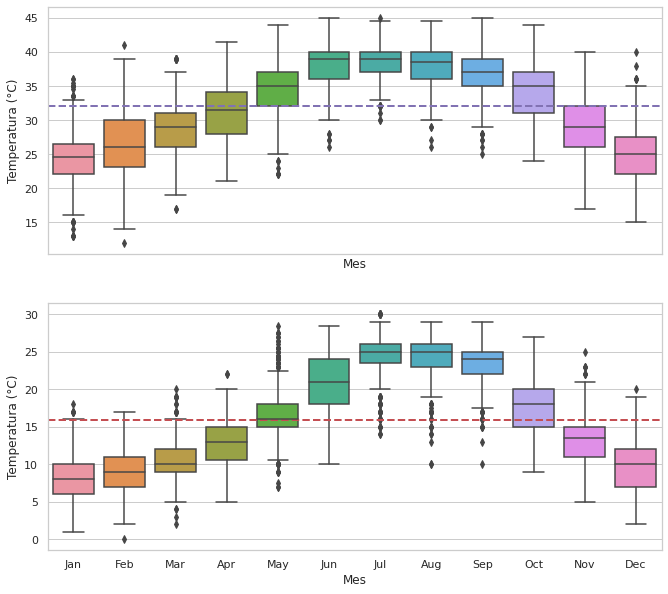

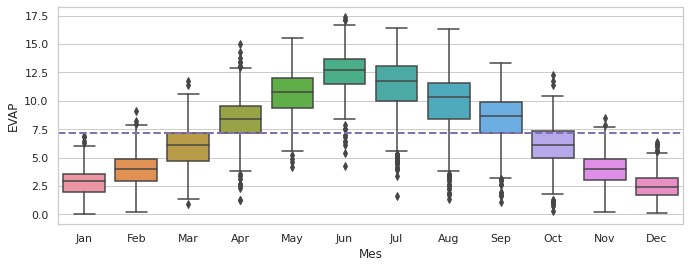

In [101]:
#Gráficamos la estacionalidad  de Temp Máx, Mín y evap filtrando los dato por mes 
#Estación 1
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for i, a in zip(['Tmax', 'Tmin'], axes):
  sns.boxplot(data=df_meteo90, x='Mes', y=i, ax=a)
  if i=='Tmax':
    a.axhline(Tmax_d90, color='m', linestyle='--', linewidth=2)
    a.set_ylabel('Temperatura (°C)')
  elif i=='Tmin':
    a.axhline(Tmin_d90, color='r', linestyle='--', linewidth=2)
    a.set_ylabel('Temperatura (°C)')
  ax.set_title(i)
  #Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

#Paso de la actividad 3 usando evaporación 
#Estación 2 
fig, axes = plt.subplots(1, 1, figsize=(11.2, 4), sharex=True)
sns.boxplot(data=df_meteo90_2, x='Mes', y='EVAP')
plt.axhline(EVAP_d90_2, color='m', linestyle='--', linewidth=2)
plt.ylabels=('Evaporación (mm)')



In [102]:
#Pasos de la actividad 4 
#Creamos un nuevo data frame de las temperaturas y evaporación con promedios moviles de 7,30,365 días
colosm=["Tmax", "Tmin"]
#creamos el nuevo data frame para la estación 1 con los promedios solicitados 
df_meteo90_7=df_meteo90[colosm].rolling(7, center=True, min_periods=1).mean()
df_meteo90_30=df_meteo90[colosm].rolling(30, center=True, min_periods=1).mean()
df_meteo90_365=df_meteo90[colosm].rolling(365, center=True, min_periods=1).mean()

#estación 2
colum_2=["EVAP"]
df_meteo90_2_7=df_meteo90_2[colum_2].rolling(7, center=True, min_periods=1).mean()
df_meteo90_2_30=df_meteo90_2[colum_2].rolling(30, center=True, min_periods=1).mean()
df_meteo90_2_365=df_meteo90_2[colum_2].rolling(365, center=True, min_periods=1).mean()


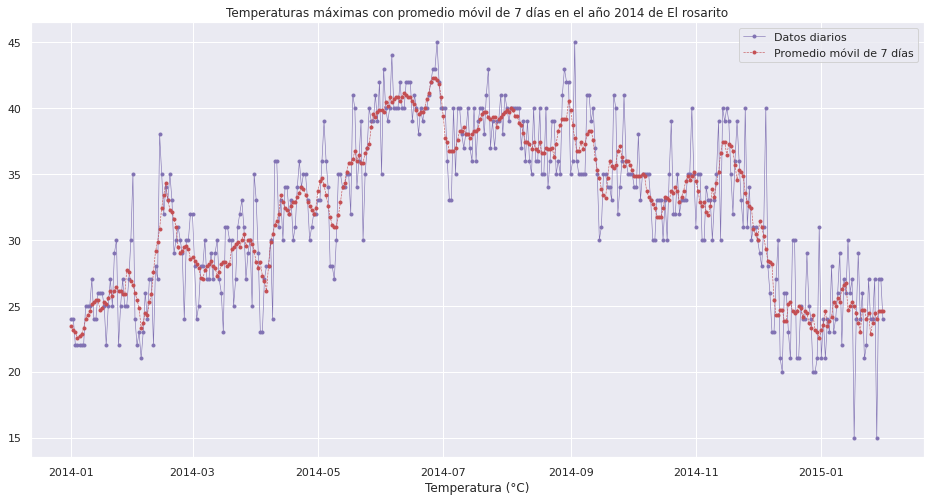

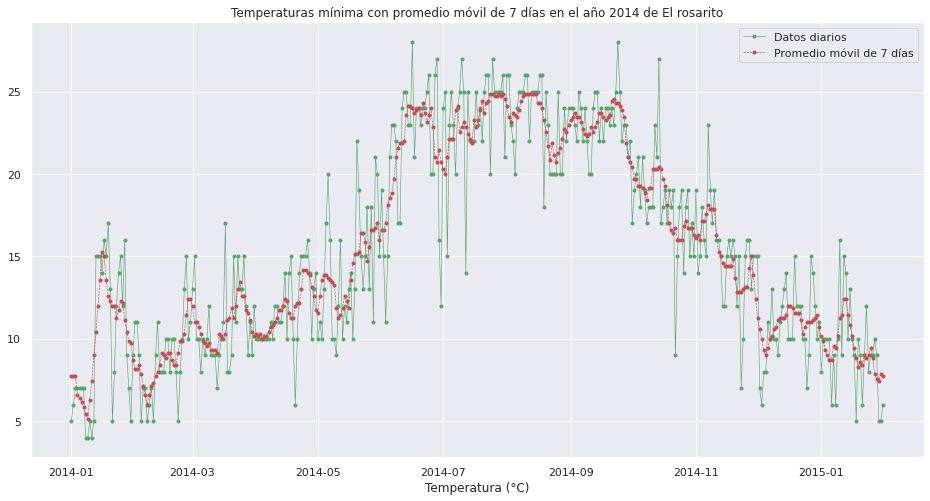

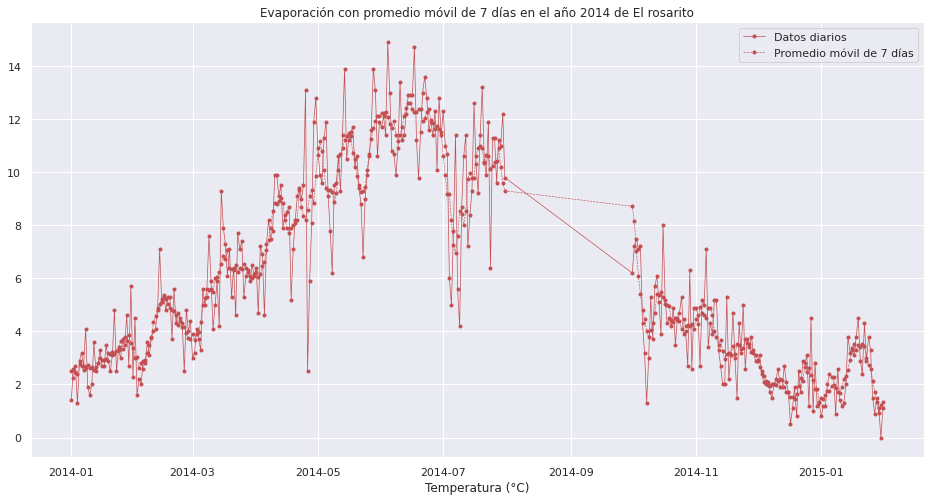

In [103]:
#hacemos las gráficas con 7 días para 1 año 
inicio, fin = '2014-01', '2015-01'

sns.set(rc={'figure.figsize':(16,8)})

#Temperatura Máxima 
fig, ax=plt.subplots()
ax.plot(df_meteo90.loc[inicio:fin, 'Tmax'], marker='.', linestyle='-',color='m', linewidth=0.6, label='Datos diarios')
ax.plot(df_meteo90_7.loc[inicio:fin, 'Tmax'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 7 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas con promedio móvil de 7 días en el año 2014 de El rosarito')
ax.legend()

#Temperatura Mínima 
fig, ax=plt.subplots()
ax.plot(df_meteo90.loc[inicio:fin, 'Tmin'], marker='.', linestyle='-',color='g', linewidth=0.6, label='Datos diarios')
ax.plot(df_meteo90_7.loc[inicio:fin, 'Tmin'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 7 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas mínima con promedio móvil de 7 días en el año 2014 de El rosarito')
ax.legend()

#Evaporación, Estación 2 
fig, ax=plt.subplots()
ax.plot(df_meteo90_2.loc[inicio:fin, 'EVAP'], marker='.', linestyle='-',color='r', linewidth=0.7, label='Datos diarios')
ax.plot(df_meteo90_2_7.loc[inicio:fin, 'EVAP'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 7 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Evaporación con promedio móvil de 7 días en el año 2014 de El rosarito')
ax.legend()


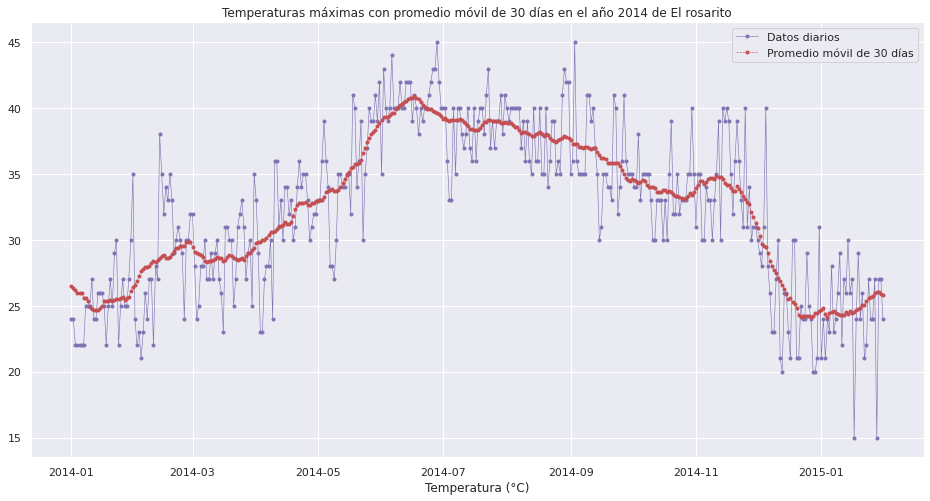

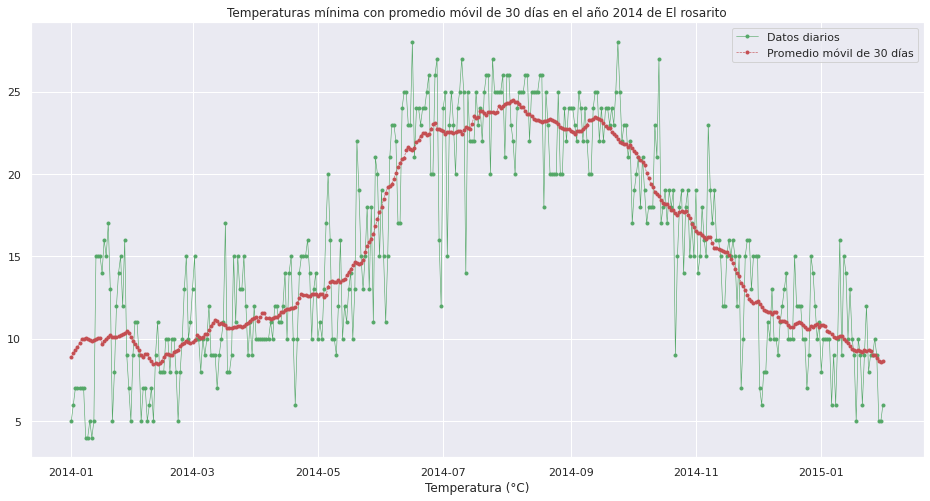

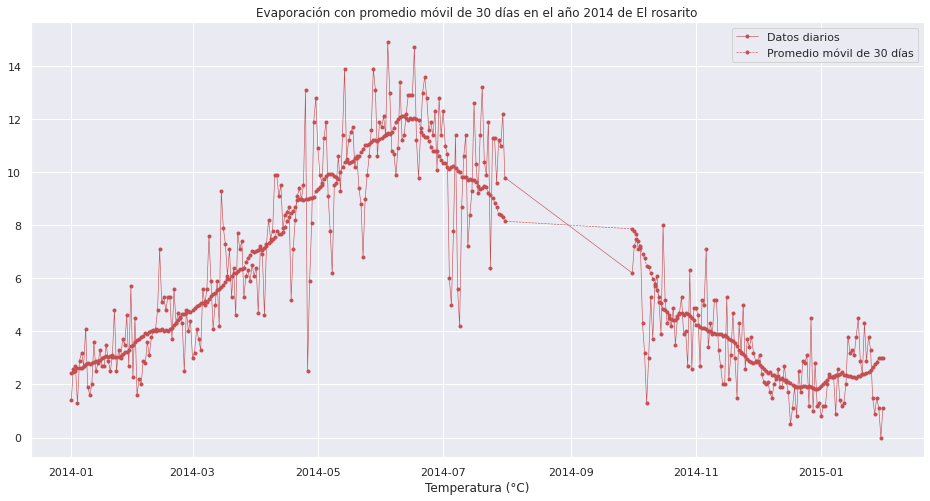

In [104]:
#ahora con 30 días 
inicio, fin = '2014-01', '2015-01'

sns.set(rc={'figure.figsize':(16,8)})

#Temperatura Máxima 
fig, ax=plt.subplots()
ax.plot(df_meteo90.loc[inicio:fin, 'Tmax'], marker='.', linestyle='-',color='m', linewidth=0.6, label='Datos diarios')
ax.plot(df_meteo90_30.loc[inicio:fin, 'Tmax'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 30 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas con promedio móvil de 30 días en el año 2014 de El rosarito')
ax.legend()

#Temperatura Mínima 
fig, ax=plt.subplots()
ax.plot(df_meteo90.loc[inicio:fin, 'Tmin'], marker='.', linestyle='-',color='g', linewidth=0.6, label='Datos diarios')
ax.plot(df_meteo90_30.loc[inicio:fin, 'Tmin'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 30 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas mínima con promedio móvil de 30 días en el año 2014 de El rosarito')
ax.legend()

#Evaporación, Estación 2 
fig, ax=plt.subplots()
ax.plot(df_meteo90_2.loc[inicio:fin, 'EVAP'], marker='.', linestyle='-',color='r', linewidth=0.6, label='Datos diarios')
ax.plot(df_meteo90_2_30.loc[inicio:fin, 'EVAP'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 30 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Evaporación con promedio móvil de 30 días en el año 2014 de El rosarito')
ax.legend()


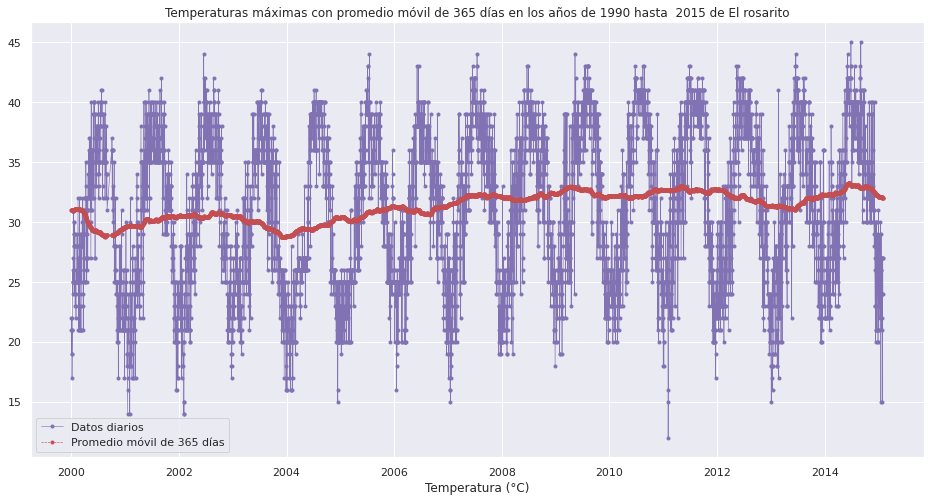

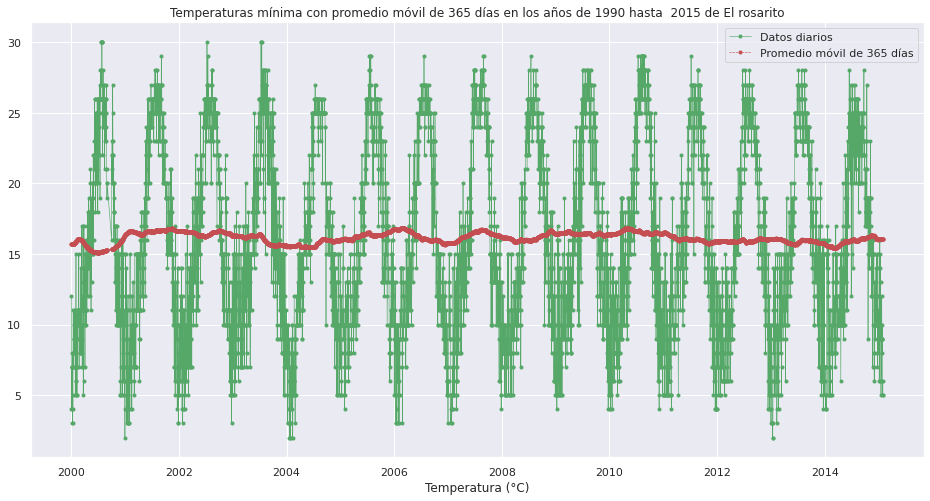

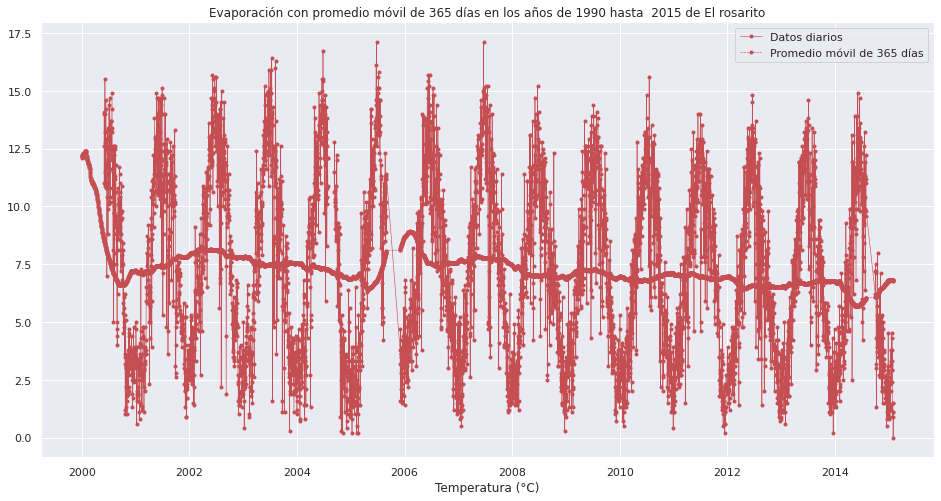

In [105]:
#ahora con 10 años o más contrastando los datos con un promedio movil de 365 días 
#10 años o más 
inicio, fin = '2000-01', '2015-01'

sns.set(rc={'figure.figsize':(16,8)})

#Temperatura Máxima 
fig, ax=plt.subplots()
ax.plot(df_meteo90.loc[inicio:fin, 'Tmax'], marker='.', linestyle='-',color='m', linewidth=0.6, label='Datos diarios')
ax.plot(df_meteo90_365.loc[inicio:fin, 'Tmax'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 365 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas con promedio móvil de 365 días en los años de 1990 hasta  2015 de El rosarito')
ax.legend()

#Temperatura Mínima 
fig, ax=plt.subplots()
ax.plot(df_meteo90.loc[inicio:fin, 'Tmin'], marker='.', linestyle='-',color='g', linewidth=0.6, label='Datos diarios')
ax.plot(df_meteo90_365.loc[inicio:fin, 'Tmin'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 365 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas mínima con promedio móvil de 365 días en los años de 1990 hasta  2015 de El rosarito')
ax.legend()

#Evaporación, Estación 2 
fig, ax=plt.subplots()
ax.plot(df_meteo90_2.loc[inicio:fin, 'EVAP'], marker='.', linestyle='-',color='r', linewidth=0.6, label='Datos diarios')
ax.plot(df_meteo90_2_365.loc[inicio:fin, 'EVAP'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 365 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Evaporación con promedio móvil de 365 días en los años de 1990 hasta  2015 de El rosarito')
ax.legend()


# Actividad 5

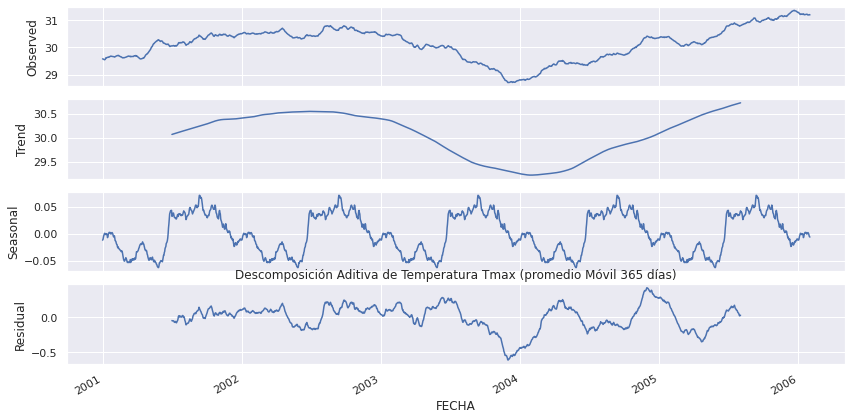

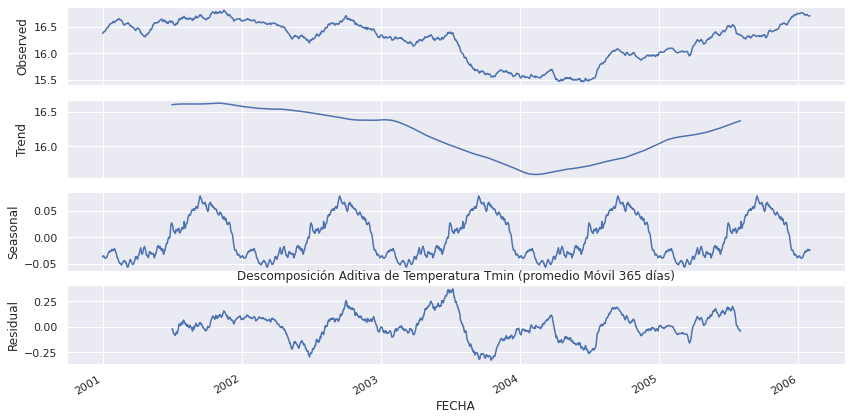

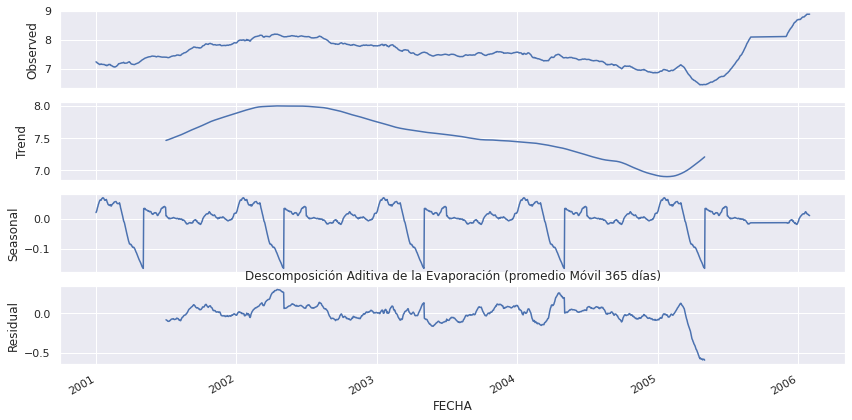

In [106]:
#utilizamos la biblioteca  statsmodels.tsa para hacer una descomposición de una serie de tiempo 
#aplicamos la función  seasonal_decompose

#Estación 1 
#descomposición de la temperatura máxima 
#tamaño
sns.set(rc={'figure.figsize':(12, 6)})
#seleccionamos el periodo 
start, end = '2001-01', '2006-01'
# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

resTmax = sm.tsa.seasonal_decompose(df_meteo90_365.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

#descomposición de la temperatura mínima 
sns.set(rc={'figure.figsize':(12, 6)})
decompfreq = 365
resTmax = sm.tsa.seasonal_decompose(df_meteo90_365.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

#Estación 2
#descomposición de la evaporación 
sns.set(rc={'figure.figsize':(12, 6)})
decompfreq = 365
resTmax = sm.tsa.seasonal_decompose(df_meteo90_2_365.loc[start:end, 'EVAP'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de la Evaporación (promedio Móvil 365 días)');





# Actividad 6 

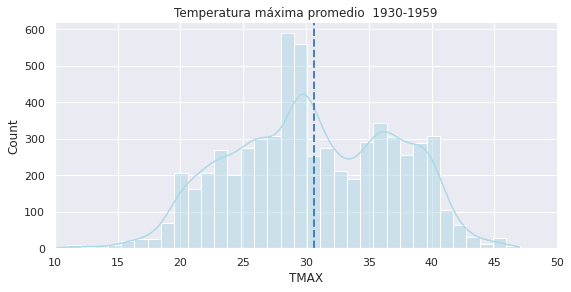

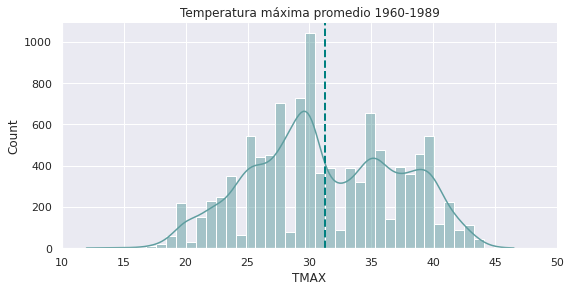

TMAX_promedio df_30 =  30.632721712538228 ºC
TMAX_promedio df_60 =  31.2803087706005 ºC


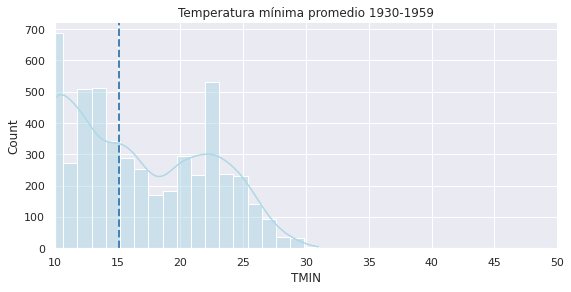

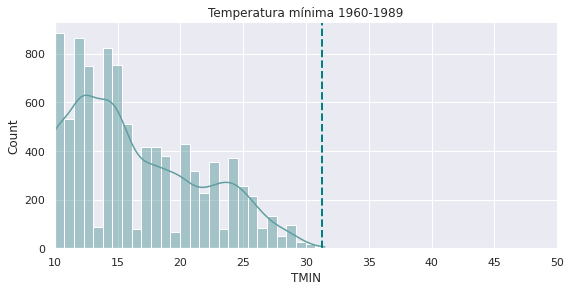

TMIN_promedio df_30 =  15.080711640637576 ºC
TMIN_promedio df_60 =  15.475994318181819 ºC


In [107]:
#distribución de la temperatura máxima 
#hacemos dos conjuntos de 30 años 
df_30= df_meteo_ts[(df_meteo_ts['Año'] >= 1930) & (df_meteo_ts['Año'] < 1960)]
df_60= df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]

g1 = sns.displot(df_30["TMAX"], kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30.TMAX.mean(), linestyle='--', linewidth=2, color='steelblue');

g2 = sns.displot(df_60["TMAX"], kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.TMAX.mean(), linestyle='--', linewidth=2, color='teal');

g1.set(title='Temperatura máxima promedio  1930-1959');
g2.set(title='Temperatura máxima promedio 1960-1989');

g1.set(xlim=(10,50))
g2.set(xlim=(10,50))

plt.show();

print('TMAX_promedio df_30 = ', df_30.TMAX.mean(), 'ºC' )
print('TMAX_promedio df_60 = ', df_60.TMAX.mean(), 'ºC' )

#Temperatura mínima 
g1 = sns.displot(df_30["TMIN"], kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30.TMIN.mean(), linestyle='--', linewidth=2, color='steelblue');

g2 = sns.displot(df_60["TMIN"], kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.TMAX.mean(), linestyle='--', linewidth=2, color='teal');

g1.set(title='Temperatura mínima promedio 1930-1959');
g2.set(title='Temperatura mínima 1960-1989');

g1.set(xlim=(10,50))
g2.set(xlim=(10,50))

plt.show();

print('TMIN_promedio df_30 = ', df_30.TMIN.mean(), 'ºC' )
print('TMIN_promedio df_60 = ', df_60.TMIN.mean(), 'ºC' )
